In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df = pd.read_csv('data/final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44738 entries, 0 to 44737
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company_permalink  44738 non-null  object 
 1   company_name       44737 non-null  object 
 2   homepage_url       41971 non-null  object 
 3   category_list      42309 non-null  object 
 4   funding_total_usd  44738 non-null  object 
 5   status             44738 non-null  object 
 6   country_code       39748 non-null  object 
 7   state_code         38563 non-null  object 
 8   region             38926 non-null  object 
 9   city               38928 non-null  object 
 10  funding_rounds     44738 non-null  int64  
 11  founded_at         33318 non-null  object 
 12  first_funding_at   44718 non-null  object 
 13  last_funding_at    44738 non-null  object 
 14  is_roundA          44738 non-null  float64
 15  is_roundB          44738 non-null  float64
 16  is_roundC          447

In [4]:
df.isnull().sum()

company_permalink        0
company_name             1
homepage_url          2767
category_list         2429
funding_total_usd        0
status                   0
country_code          4990
state_code            6175
region                5812
city                  5810
funding_rounds           0
founded_at           11420
first_funding_at        20
last_funding_at          0
is_roundA                0
is_roundB                0
is_roundC                0
is_roundD                0
is_roundE                0
is_roundF                0
is_roundG                0
is_roundH                0
investor_count           0
dtype: int64

In [5]:
df.drop(['founded_at','company_permalink','homepage_url','region','city','state_code'],inplace=True,axis=1)

In [6]:
df.isnull().sum()

company_name            1
category_list        2429
funding_total_usd       0
status                  0
country_code         4990
funding_rounds          0
first_funding_at       20
last_funding_at         0
is_roundA               0
is_roundB               0
is_roundC               0
is_roundD               0
is_roundE               0
is_roundF               0
is_roundG               0
is_roundH               0
investor_count          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

company_name         0
category_list        0
funding_total_usd    0
status               0
country_code         0
funding_rounds       0
first_funding_at     0
last_funding_at      0
is_roundA            0
is_roundB            0
is_roundC            0
is_roundD            0
is_roundE            0
is_roundF            0
is_roundG            0
is_roundH            0
investor_count       0
dtype: int64

In [9]:
df.shape[0]

38571

In [10]:
print(df['status'].value_counts())
df.drop(['category_list','company_name'],inplace=True,axis=1)
df.replace({'status':{'acquired':1,'operating':1,'closed':0,'ipo':1}},inplace=True)

operating    30183
acquired      4616
closed        2857
ipo            915
Name: status, dtype: int64


In [11]:
subs = df[df['status'] == 1]
series = subs['country_code'].value_counts()

all_countries= df['country_code'].value_counts()

print(series)

dict = {}

cumsum = 0

for i in range(series.shape[0]):
    dict[series.index[i]] = series[i]
    cumsum += series[i]
    
for i in range(all_countries.shape[0]):
    if all_countries.index[i] not in dict:
        dict[all_countries.index[i]] = 0


df['country_val'] = df['country_code'].apply(lambda x: dict[x]/cumsum)

df.drop(['country_code'],inplace=True,axis=1)


USA    20694
GBR     2589
CHN     1290
IND     1159
CAN     1037
       ...  
ALB        1
KHM        1
GGY        1
MNE        1
MCO        1
Name: country_code, Length: 121, dtype: int64


EDA

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
df = df[df['first_funding_at'] >= '1980-01-01']
df['first_funding_at'] = df['first_funding_at'].str.translate({ord(i): None for i in '-'})
df['last_funding_at'] = df['last_funding_at'].str.translate({ord(i): None for i in '-'})

df['first_funding_at'] = df['first_funding_at'].astype(int)
df['last_funding_at'] = df['last_funding_at'].astype(int)

In [14]:
# df['funding_total_usd'] = df['funding_total_usd'].astype(int)
df['funding_total_usd'] = df['funding_total_usd'].str.replace('-','-1')
df['funding_total_usd'] = df['funding_total_usd'].astype(float)
df = df[df['funding_total_usd'] > 0]

In [15]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn import under_sampling, over_sampling,combine
from sklearn.utils import shuffle

# df_1 = df[df['status']==1]
# df_0 = df[df['status']==0]

# df_1 = df_1.iloc[:int(df_0.shape[0]*0.099),:]

# df_1 = shuffle(df_1)

# df = pd.concat([df_1,df_0],axis=0)

print(df['status'].value_counts())

ov = over_sampling.SMOTE(sampling_strategy=0.346)
df_x,df_y = ov.fit_resample(df.drop(['status'],axis=1),df['status'])

df = pd.concat([df_x,df_y],axis=1)

print(df['status'].value_counts())

# uv = under_sampling.RandomUnderSampler(sampling_strategy='majority')
# df_x,df_y = uv.fit_resample(df.drop(['status'],axis=1),df['status'])

# df = pd.concat([df_x,df_y],axis=1)

# print(df['status'].value_counts())



1    30253
0     2452
Name: status, dtype: int64
1    30253
0    10467
Name: status, dtype: int64


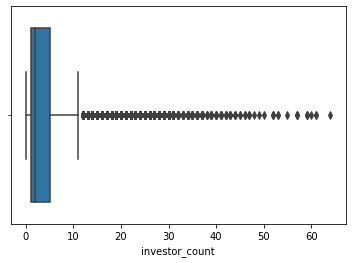

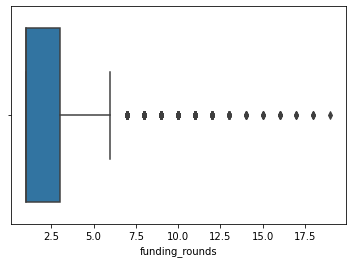

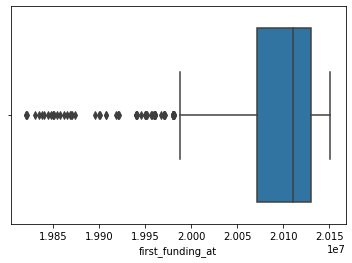

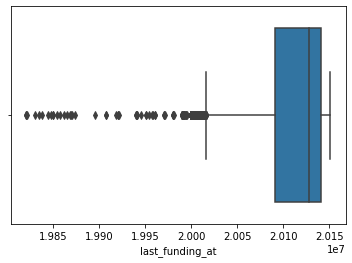

In [17]:
## box plot using seaborn
import seaborn as sns

for i in ['investor_count','funding_rounds','first_funding_at','last_funding_at']:

    sns.boxplot(x=df[i],data=df)
    plt.show()

Scatter Plot"

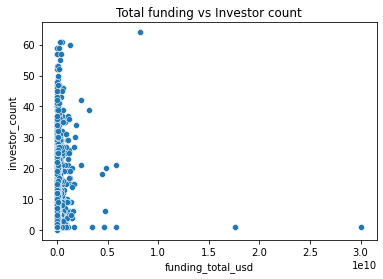

In [18]:
sns.scatterplot(x=df['funding_total_usd'],y=df['investor_count'],data=df)
plt.xlabel('funding_total_usd')
plt.ylabel('investor_count')
plt.title("Total funding vs Investor count")
plt.show()

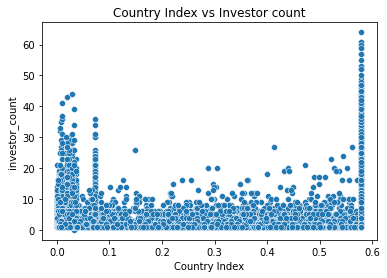

In [19]:
sns.scatterplot(x=df['country_val'],y=df['investor_count'],data=df)
plt.xlabel('Country Index')
plt.ylabel('investor_count')
plt.title("Country Index vs Investor count")
plt.show()

Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['status'],axis=1))

print(pd.DataFrame(scaled_data).head())

         0         1         2         3         4         5         6   \
0 -0.098941 -0.669235 -0.553404 -0.985360  1.533608 -0.512267 -0.350075   
1 -0.108723 -0.669235  1.061685  0.736163 -0.688293 -0.512267 -0.350075   
2  0.058861  1.263524  0.778211  1.032900  1.533608  2.041147 -0.350075   
3 -0.103186  0.619271  0.259757  0.722021 -0.688293 -0.512267 -0.350075   
4 -0.108729 -0.669235  0.781287  0.437287 -0.688293 -0.512267 -0.350075   

         7         8         9         10        11        12        13  
0 -0.223913 -0.141229 -0.082643 -0.040092 -0.016438 -0.620513 -1.229361  
1 -0.223913 -0.141229 -0.082643 -0.040092 -0.016438 -0.620513 -1.351638  
2 -0.223913 -0.141229 -0.082643 -0.040092 -0.016438  1.927995  0.835616  
3 -0.223913 -0.141229 -0.082643 -0.040092 -0.016438  1.731956  0.835616  
4 -0.223913 -0.141229 -0.082643 -0.040092 -0.016438 -0.620513 -1.335036  


PCA


Number of components :  0 , Ratio :  0
Number of components :  1 , Ratio :  0.23872313394290115
Number of components :  2 , Ratio :  0.3723083781719846
Number of components :  3 , Ratio :  0.483436392565209
Number of components :  4 , Ratio :  0.5626702336439763
Number of components :  5 , Ratio :  0.6318598367138736
Number of components :  6 , Ratio :  0.6975542449265372
Number of components :  7 , Ratio :  0.7596430803898786
Number of components :  8 , Ratio :  0.8114106308238854
Number of components :  9 , Ratio :  0.8547971841517576
Number of components :  10 , Ratio :  0.8948891414611979
Number of components :  11 , Ratio :  0.9325224888143887
Number of components :  12 , Ratio :  0.9664608765925725
Number of components :  13 , Ratio :  0.9954134468053685


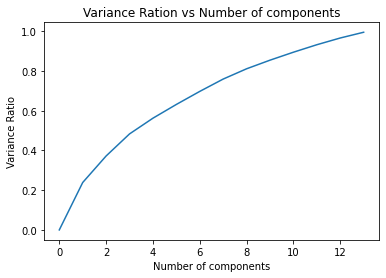

In [21]:
from sklearn.decomposition import PCA

n_comp = []
ratio = []

for i in range(len(scaled_data[0])) : 
    pca = PCA(n_components=i)
    pca.fit(scaled_data)
    
    ratio.append(sum(pca.explained_variance_ratio_))
    n_comp.append(i)
    print("Number of components : ",i,", Ratio : ",sum(pca.explained_variance_ratio_))
    
plt.plot(n_comp,ratio)
plt.xlabel("Number of components")
plt.ylabel("Variance Ratio")
plt.title("Variance Ration vs Number of components")
plt.show()
    

In [22]:
from sklearn.model_selection import train_test_split


x = scaled_data
y = df['status'].to_numpy()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(32576, 14)
(8144, 14)
(32576,)


In [23]:
def get_metrics(y_out,y_test,y_pred_proba,lg,x_test,decision_boundary=False) : 
    accuracy = metrics.accuracy_score(y_test,y_out)
    recall = metrics.recall_score(y_test,y_out)
    precision = metrics.precision_score(y_test,y_out)
    f1 = metrics.f1_score(y_test,y_out)

    print("Accuracy : ",accuracy)
    print("Recall : ",recall)
    print("Precision : ",precision)
    print("F1 : ",f1)
    
        ##ROC AUC Curve
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC AUC Curve")

    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    if decision_boundary : 
        for i in range(len(x_test[0])) : 
            temp = x_test[:,i]
            # plt.plot(temp,y_test,'x',label="Actual",c='b')
            # plt.plot(temp,y_pred,'o',label="Actual",c='r')

            bias = lg.intercept_[0]
            weights = lg.coef_[0]
            out = bias + weights[i]*temp
            
            xmin = -10
            xmax = 10
            ymin = -10
            ymax = 10
            
            xd = np.array([xmin, xmax])
            yd = weights[i]*xd + bias
            plt.plot(xd, yd, 'k', lw=1, ls='--')
            plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
            plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

            plt.scatter(x = temp[y_test==0],y = y_test[y_test==0], c='orange')
            plt.scatter(x = temp[y_test==1],y = y_test[y_test==1], c='b')
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            plt.ylabel(r'$x_2$')
            plt.xlabel(r'$x_1$')
            # plt.plot(temp,out,label="Predicted")
            # plt.xlabel("Feature "+str(i+1))
            # plt.ylabel("Probability")
            plt.title("Decision Boundary for feature : "+str(i+1))
            plt.show()
        

Logistic Regression Model

tuned hyperparameters :  {'C': 0.0015199110829529332}
accuracy : 0.7353266414992647
------------------------------------------------------------------------------
Accuracy :  0.7352652259332023
Recall :  0.945569200132758
Precision :  0.7571086898750996
F1 :  0.8409090909090909


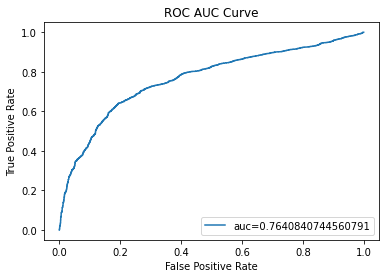

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lg_cv = LogisticRegression()

gs = GridSearchCV(lg_cv,{'C':np.logspace(-3,3,100)},cv=5)
gs.fit(x_train,y_train)

print("tuned hyperparameters : ",gs.best_params_)
print("accuracy :",gs.best_score_)
print("------------------------------------------------------------------------------")

# lg = LogisticRegression(C=gs.best_params_['C'],penalty="l2")
# lg.fit(x_train,y_train)

# y_out = lg.predict(x_test)
# y_pred_proba = lg.predict_proba(x_test)[::,1]
y_out = gs.predict(x_test)
y_pred_proba = gs.predict_proba(x_test)[::,1]

get_metrics(y_out,y_test,y_pred_proba,gs,x_test,False)

Naive Bayes Model

Gaussian Naive Bayes

tuned hyperparameters :  {'var_smoothing': 1.0}
accuracy : 0.3859588841352557
------------------------------------------------------------------------------
Accuracy :  0.38138506876227896
Recall :  0.18005310321938267
Precision :  0.9179357021996616
F1 :  0.301054384017758


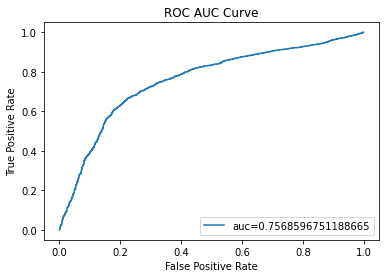

In [25]:
from sklearn.naive_bayes import GaussianNB

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gs_gnb = GridSearchCV(GaussianNB(),param_grid_nb,cv=5)
gs_gnb.fit(x_train,y_train)

print("tuned hyperparameters : ",gs_gnb.best_params_)
print("accuracy :",gs_gnb.best_score_)
print("------------------------------------------------------------------------------")

# gnb = GaussianNB(var_smoothing=gs_gnb.best_params_['var_smoothing'])
# gnb.fit(x_train,y_train)
# y_out = gnb.predict(x_test)
# y_pred_proba = gnb.predict_proba(x_test)[::,1]

y_out = gs_gnb.predict(x_test)
y_pred_proba = gs_gnb.predict_proba(x_test)[::,1]

get_metrics(y_out,y_test,y_pred_proba,gs_gnb,x_test)


Bernoulli Naive Bayes

Accuracy :  0.7432465618860511
Recall :  0.8247593760371722
Precision :  0.8276436303080766
F1 :  0.8261989859529548


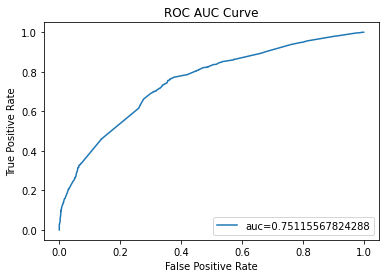

In [26]:
from sklearn.naive_bayes import BernoulliNB

# param_grid_nb = {
#     'var_smoothing': np.logspace(0,-9, num=100)
# }

# gs_bnb = GridSearchCV(BernoulliNB(),param_grid_nb,cv=5)
# gs_bnb.fit(x_train,y_train)

# print("tuned hyperparameters : ",gs_bnb.best_params_)
# print("accuracy :",gs_bnb.best_score_)
# print("------------------------------------------------------------------------------")

bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_out = bnb.predict(x_test)
y_pred_proba = bnb.predict_proba(x_test)[::,1]

get_metrics(y_out,y_test,y_pred_proba,bnb,x_test)

Decision Tree

Classifier Without pruning 

tuned hyperparameters :  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy : 0.878867693055691
------------------------------------------------------------------------------
Accuracy :  0.8807711198428291
Recall :  0.9289744440756721
Precision :  0.9115779189057157
F1 :  0.9201939672885675


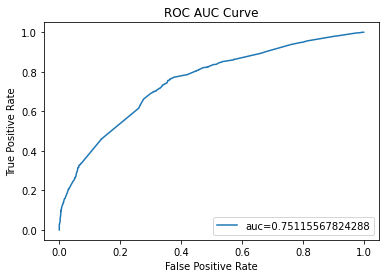

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_gs = DecisionTreeClassifier()
gs = GridSearchCV(dt_gs,{'max_depth': [5,6,8,10,12,20,22,25,50,100],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10],'criterion':('gini','entropy')},cv=5)
gs.fit(x_train,y_train)

print("tuned hyperparameters : ",gs.best_params_)
print("accuracy :",gs.best_score_)
print("------------------------------------------------------------------------------")

y_out = gs.predict(x_test)
y_out_proba = gs.predict_proba(x_test)[::,1]

get_metrics(y_out,y_test,y_pred_proba,gs,x_test)

In [28]:
#using graphviz to visualize the decision tree
# import graphviz
# from sklearn.tree import export_graphviz
# # DOT data
# dot_data = export_graphviz(gs, out_file=None, 
#                                 feature_names=df.iloc[:,0:-1].columns,  
#                                 class_names=None,
#                                 filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph.render("dtree_render")


tuned hyperparameters :  {'n_estimators': 200}
accuracy : 0.9118674900015875
------------------------------------------------------------------------------
Accuracy :  0.9129420432220039
Recall :  0.9852306671091935
Precision :  0.9054445630623761
F1 :  0.9436541365334181


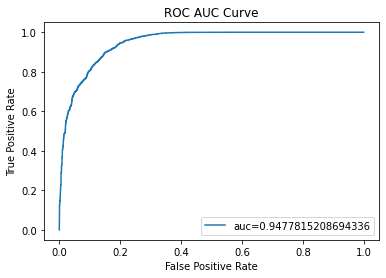

In [29]:
from sklearn.ensemble import RandomForestClassifier

gs_rfc = RandomForestClassifier(min_samples_leaf=gs.best_params_['min_samples_leaf'],min_samples_split=gs.best_params_['min_samples_split'],max_depth=gs.best_params_['max_depth'],criterion=gs.best_params_['criterion'])
gs_rf = GridSearchCV(gs_rfc,{'n_estimators': [10,100,200,400,600,800,1000]},cv=5)
gs_rf.fit(x_train,y_train)

print("tuned hyperparameters : ",gs_rf.best_params_)
print("accuracy :",gs_rf.best_score_)
print("------------------------------------------------------------------------------")

y_out = gs_rf.predict(x_test)
y_pred_proba = gs_rf.predict_proba(x_test)[::,1]

get_metrics(y_out,y_test,y_pred_proba,gs_rf,x_test)